In [3]:
# USUAL SUSPECTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
import seaborn as sns
from scipy.stats import norm
# sklearn stuff
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


Training and validation dataset: https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/HouseTraining.csv

* The last column of the HouseTraining.csv file lists price of 400 houses.
* There are 11 features
  * School rating (integer between 1 and 10)
  * House Area (sq ft)
  * Lot Area (sq ft)
  * Number of rooms
  * Number of bathrooms
  * Garage Yes:1, No: 0
  * Pool Yes:1, No: 0
  * Age of the House (years)
  * Walkability rating (something between 1 and 10)
  * Crime rate (something between 1 and 10)
  * Zipcode (Note that this is a fake data) 
  * House price ($)


<b>1.1</b> Calculate the average crime rate for each zip code determine the zipcode with highest average crime rate? <br>
<b>1.2</b> Calculate the average house price for each zip code determine the zipcode with lowest average house price? Do you see a pattern? <br>
<b>1.3 </b> What feature has the strongest correlation with the "School_Rating" <br>
<b>1.4</b> Split your dataset into two (training 80\%, validation (testing) \%20, random_state=1). Build a multiple linear regression model to estimate the house price from all the other features we have and calculate the maximum relative error using $100*\mathrm{max}|(y_i-\hat{y}_i)/y_i|$ and $R^2$, where $y_i$ is the true value for the $i^{th}$ case in your testing data set and $\hat{y}_i$ is the prediction. <br>
<b>1.5</b> Download the new test dataset (https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/HouseTest.csv), guess the prices of these 10 houses featured in this dataset and print your predictions. Note that this dataset doesn't include "House_Price" column which was given in the training dataset.

In [4]:

df = pd.read_csv("https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/HouseTraining.csv")
df.head(20)

,Unnamed: 0,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,House_Price
0,0,8,3672,7364,5.0,5.0,1.0,0.0,8,8.0,4,20104,15332000.0
1,1,6,1743,3893,2.0,2.0,0.0,0.0,33,5.0,8,20140,6411000.0
2,2,8,2242,5199,3.0,3.0,1.0,0.0,34,7.0,6,20182,8931000.0
3,3,8,2257,4699,3.0,3.0,0.0,1.0,42,6.0,5,20182,8662000.0
4,4,8,2436,5200,3.0,3.0,1.0,0.0,70,7.0,6,20182,9098000.0
5,5,6,3306,6911,5.0,4.0,0.0,0.0,45,7.0,6,20174,13208000.0
6,6,6,2618,5383,4.0,3.0,1.0,0.0,9,8.0,5,20174,10036000.0
7,7,6,3810,7531,5.0,5.0,0.0,0.0,30,5.0,8,20140,15080000.0
8,8,6,2366,5008,3.0,2.0,1.0,0.0,28,6.0,6,20174,9093000.0
9,9,8,3401,6302,5.0,4.0,0.0,0.0,26,7.0,6,20182,12545000.0


In [5]:
#1.1 Calculate the average crime rate for each zip code determine the zipcode with highest average crime rate?
print(df.groupby('Zipcode', as_index=False)['Crime_Rate'].mean().sort_values(by=['Crime_Rate']))
print("\nThe Zipcode with highesr average crime rate is '20140")

   Zipcode  Crime_Rate
0    20104    4.283784
4    20182    4.500000
1    20119    4.610390
3    20174    6.368421
2    20140    6.511905

The Zipcode with highesr average crime rate is '20140


In [6]:
#1.2 Calculate the average house price for each zip code determine the zipcode with lowest average house price? Do you see a pattern?
print(df.groupby('Zipcode', as_index=False)['House_Price'].mean().sort_values(by=['House_Price']))
print("\nThe lowest average price for house for the zipcode is '20140'")
print("\n we can see that the highest average crime rate zipcode has lowest average house prices. So as the crime rate increases the house price dectreases.")

   Zipcode   House_Price
2    20140  1.030618e+07
3    20174  1.063704e+07
0    20104  1.083254e+07
1    20119  1.087213e+07
4    20182  1.090149e+07

The lowest average price for house for the zipcode is '20140'

 we can see that the highest average crime rate zipcode has lowest average house prices. So as the crime rate increases the house price dectreases.


In [7]:
#1.3 What feature has the strongest correlation with the "School_Rating"
df.corr()
correlations = df.corr().unstack().sort_values(ascending=False)
correlations = pd.DataFrame(correlations).reset_index()
correlations.columns = ['col1', 'col2', 'correlation']
print(correlations.query("col1 == 'School_Rating' & col2 != 'School_Rating'"))
print(f"\nThe feature that has the strongest correlation with the School_Rating is Walkability\n")
df.corr()

              col1         col2  correlation
33   School_Rating  Walkability     0.373675
49   School_Rating  House_Price     0.081382
81   School_Rating       Garage     0.016915
85   School_Rating      Bath_No     0.011234
90   School_Rating      Room_No     0.005996
97   School_Rating   House_Area     0.003273
100  School_Rating         Pool     0.001310
123  School_Rating     Lot_Area    -0.012608
131  School_Rating   Unnamed: 0    -0.014608
158  School_Rating    House_Age    -0.114875
163  School_Rating      Zipcode    -0.402891
168  School_Rating   Crime_Rate    -0.651958

The feature that has the strongest correlation with the School_Rating is Walkability



,Unnamed: 0,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,House_Price
Unnamed: 0,1.000000,-0.014608,0.000759,-0.046438,0.013790,0.024150,-0.004329,-0.000087,0.072174,-0.039180,0.000065,-0.081848,-0.021255
School_Rating,-0.014608,1.000000,0.003273,-0.012608,0.005996,0.011234,0.016915,0.001310,-0.114875,0.373675,-0.651958,-0.402891,0.081382
House_Area,0.000759,0.003273,1.000000,0.692192,0.956632,0.864089,0.126806,0.038590,0.003496,-0.001421,0.004005,0.050490,0.927668
Lot_Area,-0.046438,-0.012608,0.692192,1.000000,0.663507,0.628391,0.066005,0.039591,0.003279,0.041527,-0.028160,0.020762,0.875865
Room_No,0.013790,0.005996,0.956632,0.663507,1.000000,0.899354,0.160627,0.058216,-0.012671,0.022116,-0.007340,0.018870,0.892501
Bath_No,0.024150,0.011234,0.864089,0.628391,0.899354,1.000000,0.126592,0.054423,-0.001166,0.006643,-0.015384,-0.007733,0.816760
Garage,-0.004329,0.016915,0.126806,0.066005,0.160627,0.126592,1.000000,-0.003750,-0.048396,0.021130,-0.028996,-0.075111,0.124467
Pool,-0.000087,0.001310,0.038590,0.039591,0.058216,0.054423,-0.003750,1.000000,-0.003237,-0.052538,-0.014438,-0.014279,0.057346
House_Age,0.072174,-0.114875,0.003496,0.003279,-0.012671,-0.001166,-0.048396,-0.003237,1.000000,-0.087509,0.065937,0.102555,-0.016291
Walkability,-0.039180,0.373675,-0.001421,0.041527,0.022116,0.006643,0.021130,-0.052538,-0.087509,1.000000,-0.597465,-0.191964,0.099872


In [8]:
#1.4 Split your dataset into two (training 80%, validation (testing) %20, random_state=1). 
#Build a multiple linear regression model to estimate the house price from all the other features 
#we have and calculate the maximum relative error using  100∗max|(𝑦𝑖−𝑦̂ 𝑖)/𝑦𝑖|  and 
# 𝑅2 , where  𝑦𝑖  is the true value for the  𝑖𝑡ℎ  case in your testing data set and  𝑦̂ 𝑖  is the prediction.
df['House_Area'] = np.log(df['House_Area'])
df['Lot_Area'] = np.log(df['Lot_Area'])
df['House_Age'] = np.log(df['House_Age'])
df['House_Price'] = np.log(df['House_Price'])
zip_codes = {"Zipcode": {20104: 0, 20119:1, 20140:2, 20174:3, 20182:4}}
df = df.replace(zip_codes)
df.head(10)

,Unnamed: 0,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,House_Price
0,0,8,8.208492,8.904359,5.0,5.0,1.0,0.0,2.079442,8.0,4,0,16.545453
1,1,6,7.463363,8.266935,2.0,2.0,0.0,0.0,3.496508,5.0,8,2,15.673526
2,2,8,7.715124,8.556222,3.0,3.0,1.0,0.0,3.526361,7.0,6,4,16.005039
3,3,8,7.721792,8.455105,3.0,3.0,0.0,1.0,3.737670,6.0,5,4,15.974456
4,4,8,7.798113,8.556414,3.0,3.0,1.0,0.0,4.248495,7.0,6,4,16.023565
5,5,6,8.103494,8.840870,5.0,4.0,0.0,0.0,3.806662,7.0,6,3,16.396333
6,6,6,7.870166,8.591001,4.0,3.0,1.0,0.0,2.197225,8.0,5,3,16.121689
7,7,6,8.245384,8.926783,5.0,5.0,0.0,0.0,3.401197,5.0,8,2,16.528880
8,8,6,7.768956,8.518792,3.0,2.0,1.0,0.0,3.332205,6.0,6,3,16.023015
9,9,8,8.131825,8.748622,5.0,4.0,0.0,0.0,3.258097,7.0,6,4,16.344833


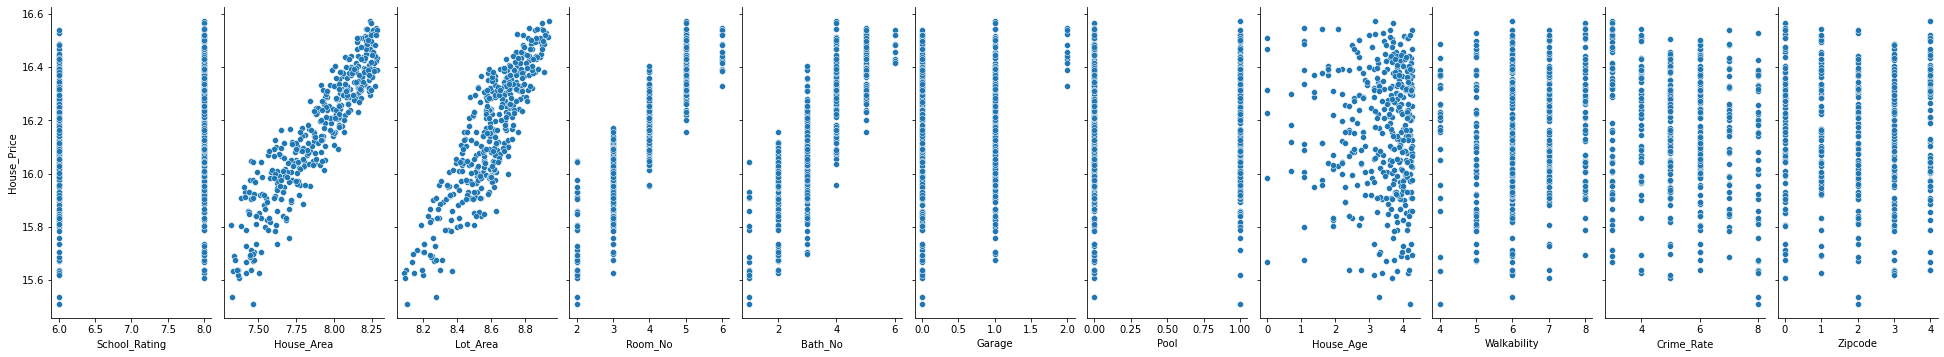

In [9]:
list_1 = ['School_Rating', 'House_Area', 'Lot_Area',"Room_No","Bath_No","Garage","Pool","House_Age","Walkability","Crime_Rate","Zipcode"]
sns.pairplot(df, x_vars=list_1, y_vars='House_Price', height=5, aspect=0.5)

In [10]:

#list_1 = ['School_Rating', 'House_Area', 'Lot_Area',"Room_No","Bath_No","Garage","Pool","House_Age","Walkability","Crime_Rate","Zipcode"]
feature_cols = ['School_Rating', 'House_Area', 'Lot_Area',"Room_No","Bath_No","Garage","Pool","House_Age","Walkability","Crime_Rate","Zipcode"]
X = df[feature_cols]
y = df.House_Price

lm2 = LinearRegression()
lm2.fit(X, y)
print(lm2.intercept_)
print(lm2.coef_)

7.337035173539601
[-0.00212311  0.51328786  0.5671404   0.00716817 -0.00275324  0.00315077
  0.00795967 -0.00177152  0.00112198 -0.02067073 -0.00228647]


In [11]:
y_pred = lm2.predict(X)
r2_score(y, y_pred)

0.9837595736395222

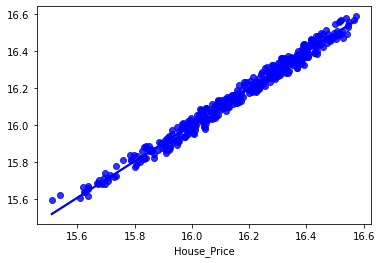

In [12]:
sns.regplot(x=y, y=y_pred, ci=None, color="b")

In [13]:
#1.5 Download the new test dataset (https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/HouseTest.csv),
# guess the prices of these 10 houses featured in this dataset and print your predictions. 
#Note that this dataset doesn't include "House_Price" column which was given in the training dataset.
df2 = pd.read_csv("https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/HouseTest.csv")
df2['House_Area'] = np.log(df2['House_Area'])
df2['Lot_Area'] = np.log(df2['Lot_Area'])
df2['House_Age'] = np.log(df2['House_Age'])
zip_codes = {"Zipcode": {20124: 0, 20165:1, 20166:2, 20170:3, 20189:4}}
df2 = df2.replace(zip_codes)
df2.drop(df2.columns[0],axis=1,inplace=True)

y_test1= lm2.predict(df2)
print(list(y_test1))
df2["House_prices"] = y_test1
print(f"\nThe new data frame with predicted house prices are: ")
df2

[15.967151452253503, 15.986903593476146, 16.368156720463446, 15.9671209964219, 16.16318463647999, 16.3688414413194, 16.126326942001995, 16.283468577286605, 16.39728782798906, 15.736646298188498]

The new data frame with predicted house prices are: 


,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,House_prices
0,8,7.615791,8.458504,3.0,2.0,1.0,1.0,3.871201,7.0,4,2,15.967151
1,8,7.461066,8.612322,2.0,2.0,0.0,1.0,3.610918,8.0,3,2,15.986904
2,7,8.196437,8.646290,5.0,5.0,1.0,0.0,4.077537,6.0,4,3,16.368157
3,4,7.610358,8.601718,3.0,2.0,0.0,0.0,0.693147,4.0,8,0,15.967121
4,9,7.745436,8.736650,3.0,3.0,1.0,0.0,2.833213,8.0,5,1,16.163185
5,8,8.205765,8.707648,5.0,4.0,1.0,0.0,3.713572,5.0,6,2,16.368841
6,4,7.841886,8.653122,4.0,3.0,1.0,1.0,3.761200,5.0,8,0,16.126327
7,9,8.022897,8.678632,4.0,4.0,0.0,1.0,0.693147,6.0,5,1,16.283469
8,7,8.032360,8.843615,4.0,4.0,0.0,1.0,2.197225,6.0,4,4,16.397288
9,7,7.448916,8.264363,2.0,1.0,0.0,0.0,2.302585,8.0,5,4,15.736646


In [14]:
print('mean_sqrd_error is==', mean_squared_error(y,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y,y_pred)))

mean_sqrd_error is== 0.0008704929440794492
root_mean_squared error of is== 0.029504117408921914
